In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
!wget https://raw.githubusercontent.com/Bt-PplusK/Heart_attack/main/heart_attack_prediction_dataset.csv

--2023-11-06 07:42:55--  https://raw.githubusercontent.com/Bt-PplusK/Heart_attack/main/heart_attack_prediction_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1456385 (1.4M) [text/plain]
Saving to: ‘heart_attack_prediction_dataset.csv.1’

heart_attack_predic 100%[===================>]   1.39M  --.-KB/s    in 0.07s   

2023-11-06 07:42:56 (18.6 MB/s) - ‘heart_attack_prediction_dataset.csv.1’ saved [1456385/1456385]



In [ ]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] =df[c].str.lower().str.replace(' ','_')


In [ ]:
df

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk
0,bmw7812,67,male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,argentina,south_america,southern_hemisphere,0
1,cze1114,21,male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,canada,north_america,northern_hemisphere,0
2,bni9906,21,female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,france,europe,northern_hemisphere,0
3,jln3497,84,male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,canada,north_america,northern_hemisphere,0
4,gfo8847,66,male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,thailand,asia,northern_hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,msv9918,60,male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,thailand,asia,northern_hemisphere,0
8759,qsv6764,28,female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,canada,north_america,northern_hemisphere,0
8760,xka5925,47,male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,brazil,south_america,southern_hemisphere,1
8761,epe6801,36,male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,brazil,south_america,southern_hemisphere,0


In [ ]:
df.dtypes

patient_id                          object
age                                  int64
sex                                 object
cholesterol                          int64
blood_pressure                      object
heart_rate                           int64
diabetes                             int64
family_history                       int64
smoking                              int64
obesity                              int64
alcohol_consumption                  int64
exercise_hours_per_week            float64
diet                                object
previous_heart_problems              int64
medication_use                       int64
stress_level                         int64
sedentary_hours_per_day            float64
income                               int64
bmi                                float64
triglycerides                        int64
physical_activity_days_per_week      int64
sleep_hours_per_day                  int64
country                             object
continent  

In [ ]:
df.heart_attack_risk.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: heart_attack_risk, dtype: int64

In [ ]:
df.heart_attack_risk.value_counts(normalize=True)

0    0.641789
1    0.358211
Name: heart_attack_risk, dtype: float64

In [ ]:
df.heart_attack_risk .mean()

0.3582106584503024

In [ ]:
df.columns

Index(['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity',
       'alcohol_consumption', 'exercise_hours_per_week', 'diet',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'continent', 'hemisphere', 'heart_attack_risk'],
      dtype='object')

In [ ]:
df.shape

(8763, 26)

# features analysis


In [ ]:
df_features = df[['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity',
       'alcohol_consumption', 'exercise_hours_per_week', 'diet',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'continent', 'hemisphere']]
df_features.head()

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere
0,bmw7812,67,male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,argentina,south_america,southern_hemisphere
1,cze1114,21,male,389,165/93,98,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,canada,north_america,northern_hemisphere
2,bni9906,21,female,324,174/99,72,1,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,france,europe,northern_hemisphere
3,jln3497,84,male,383,163/100,73,1,1,1,0,...,9,7.648981,125640,36.464704,378,3,4,canada,north_america,northern_hemisphere
4,gfo8847,66,male,318,91/88,93,1,1,1,1,...,6,1.514821,160555,21.809144,231,1,5,thailand,asia,northern_hemisphere


In [ ]:
df_features.shape

(8763, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       8763 non-null   object 
 1   age                              8763 non-null   int64  
 2   sex                              8763 non-null   object 
 3   cholesterol                      8763 non-null   int64  
 4   blood_pressure                   8763 non-null   object 
 5   heart_rate                       8763 non-null   int64  
 6   diabetes                         8763 non-null   int64  
 7   family_history                   8763 non-null   int64  
 8   smoking                          8763 non-null   int64  
 9   obesity                          8763 non-null   int64  
 10  alcohol_consumption              8763 non-null   int64  
 11  exercise_hours_per_week          8763 non-null   float64
 12  diet                

In [ ]:
df_features.isna().sum()

patient_id                         0
age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
income                             0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
continent                          0
hemisphere                         0
dtype: int64

In [ ]:
for col in df_features:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

patient_id
['bmw7812' 'cze1114' 'bni9906' 'jln3497' 'gfo8847']
8763

age
[67 21 84 66 54]
73

sex
['male' 'female']
2

cholesterol
[208 389 324 383 318]
281

blood_pressure
['158/88' '165/93' '174/99' '163/100' '91/88']
3915

heart_rate
[72 98 73 93 48]
71

diabetes
[0 1]
2

family_history
[0 1]
2

smoking
[1 0]
2

obesity
[0 1]
2

alcohol_consumption
[0 1]
2

exercise_hours_per_week
[4.16818884 1.81324162 2.07835299 9.82812959 5.80429882]
8763

diet
['average' 'unhealthy' 'healthy']
3

previous_heart_problems
[0 1]
2

medication_use
[0 1]
2

stress_level
[9 1 6 2 7]
10

sedentary_hours_per_day
[6.61500145 4.96345884 9.46342584 7.64898082 1.51482093]
8763

income
[261404 285768 235282 125640 160555]
8615

bmi
[31.25123273 27.19497335 28.17657068 36.46470429 21.80914418]
8763

triglycerides
[286 235 587 378 231]
771

physical_activity_days_per_week
[0 1 4 3 5]
8

sleep_hours_per_day
[ 6  7  4  5 10]
7

country
['argentina' 'canada' 'france' 'thailand' 'germany']
20

continent
['south_am

In [ ]:
df['heart_attack_risk'].value_counts()

0    5624
1    3139
Name: heart_attack_risk, dtype: int64

In [ ]:
data_numeric = df.copy()
data_numeric

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk
0,bmw7812,67,male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,argentina,south_america,southern_hemisphere,0
1,cze1114,21,male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,canada,north_america,northern_hemisphere,0
2,bni9906,21,female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,france,europe,northern_hemisphere,0
3,jln3497,84,male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,canada,north_america,northern_hemisphere,0
4,gfo8847,66,male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,thailand,asia,northern_hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,msv9918,60,male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,thailand,asia,northern_hemisphere,0
8759,qsv6764,28,female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,canada,north_america,northern_hemisphere,0
8760,xka5925,47,male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,brazil,south_america,southern_hemisphere,1
8761,epe6801,36,male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,brazil,south_america,southern_hemisphere,0


In [ ]:
columns_to_drop = ['patient_id', 'country', 'continent']
data_numeric = df.drop(columns_to_drop, axis=1)
data_numeric.describe()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [ ]:
data_numeric.corr()

<ipython-input-73-f7878dd4a6c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_numeric.corr()


,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk
age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403
cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340
heart_rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251
diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225
family_history,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652
smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051
obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318
alcohol_consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778
exercise_hours_per_week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245,0.011133
previous_heart_problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.002694,-0.003281,0.015718,-0.019029,0.008537,0.004460,0.000274


<ipython-input-74-b1b4195bea8c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')


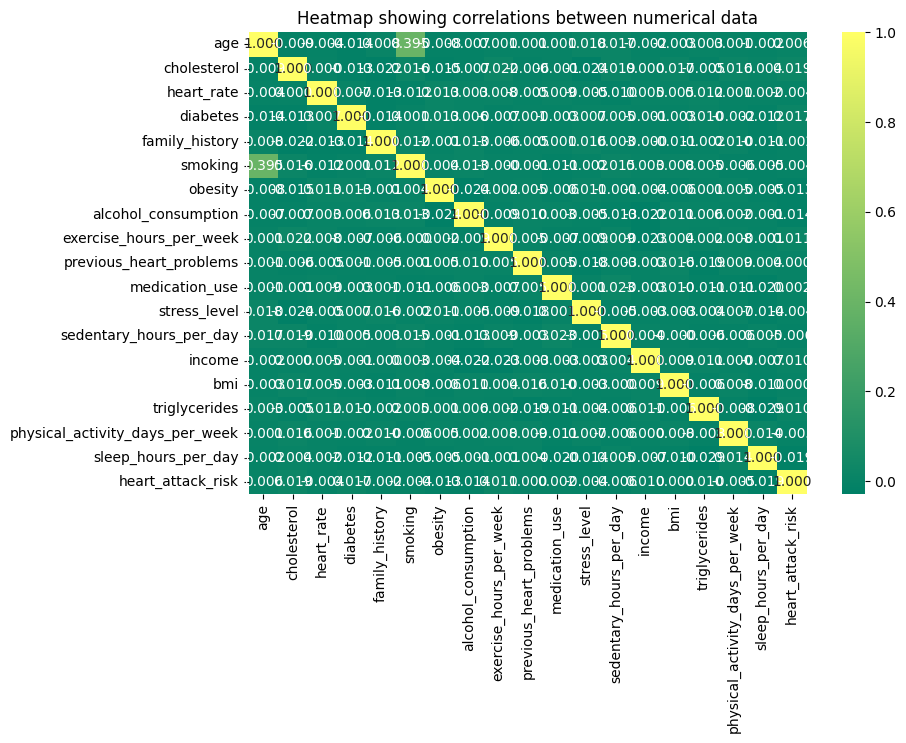

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [ ]:
data_numeric.corr().unstack().sort_values(ascending = False)

<ipython-input-75-88389a3b897a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_numeric.corr().unstack().sort_values(ascending = False)


age                  age                    1.000000
medication_use       medication_use         1.000000
diabetes             diabetes               1.000000
family_history       family_history         1.000000
smoking              smoking                1.000000
                                              ...   
obesity              alcohol_consumption   -0.024195
cholesterol          stress_level          -0.024487
stress_level         cholesterol           -0.024487
sleep_hours_per_day  triglycerides         -0.029216
triglycerides        sleep_hours_per_day   -0.029216
Length: 361, dtype: float64

In [ ]:
data_numeric

,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,hemisphere,heart_attack_risk
0,67,male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,southern_hemisphere,0
1,21,male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,northern_hemisphere,0
2,21,female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,northern_hemisphere,0
3,84,male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,northern_hemisphere,0
4,66,male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,northern_hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,male,121,94/76,61,1,1,1,0,1,...,1,8,10.806373,235420,19.655895,67,7,7,northern_hemisphere,0
8759,28,female,120,157/102,73,1,0,0,1,0,...,0,8,3.833038,217881,23.993866,617,4,9,northern_hemisphere,0
8760,47,male,250,161/75,105,0,1,1,1,1,...,0,5,2.375214,36998,35.406146,527,4,4,southern_hemisphere,1
8761,36,male,178,119/67,60,1,0,1,0,0,...,1,5,0.029104,209943,27.294020,114,2,8,southern_hemisphere,0


In [ ]:
sex= { 'male' : 0, 	'female': 1}
df['sex'] = df['sex'].replace(sex)

In [ ]:
hemisphere= { 'northern_hemisphere ' : 0, 	'southern_hemisphere   ': 1}
df['hemisphere'] = df['hemisphere'].replace(hemisphere)

In [ ]:
df['heart_attack_risk'].isna().sum()

0

In [ ]:
df['sex'] = df['sex'].fillna(0)

In [ ]:
df['hemisphere'] = df['hemisphere'].fillna(0)

In [ ]:
df

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk
0,bmw7812,67,0,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,argentina,south_america,southern_hemisphere,0
1,cze1114,21,0,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,canada,north_america,northern_hemisphere,0
2,bni9906,21,1,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,france,europe,northern_hemisphere,0
3,jln3497,84,0,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,canada,north_america,northern_hemisphere,0
4,gfo8847,66,0,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,thailand,asia,northern_hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,msv9918,60,0,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,thailand,asia,northern_hemisphere,0
8759,qsv6764,28,1,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,canada,north_america,northern_hemisphere,0
8760,xka5925,47,0,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,brazil,south_america,southern_hemisphere,1
8761,epe6801,36,0,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,brazil,south_america,southern_hemisphere,0


In [ ]:
categorical_columns = ['patient_id','blood_pressure','country']
categorical_columns

['patient_id', 'blood_pressure', 'country']

In [ ]:
numeric_columns = ['age',
 'cholesterol',
 'heart_rate',
 'exercise_hours_per_week',
 'sedentary_hours_per_day',
 'income',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day',
]
numeric_columns

['age',
 'cholesterol',
 'heart_rate',
 'exercise_hours_per_week',
 'sedentary_hours_per_day',
 'income',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day']

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train,df_val = train_test_split(df_full_train,test_size = 0.25,random_state =1 )

In [ ]:
len(df_full_train),len(df_test),len(df_val)

(7010, 1753, 1753)

In [ ]:
df_train = df_train.reset_index(drop =True)
df_val = df_val.reset_index(drop =True)
df_test = df_test.reset_index(drop =True)

In [ ]:
y_train = df_train['heart_attack_risk'].values
y_val = df_val['heart_attack_risk'].values
y_test = df_test['heart_attack_risk'].values

In [ ]:
del df_train['heart_attack_risk']
del df_val['heart_attack_risk']
del df_test['heart_attack_risk']

In [ ]:
df_train

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere
0,dyf5450,89,0,277,164/88,60,0,1,1,0,...,7,4.764049,96232,20.657548,240,0,4,south_korea,asia,northern_hemisphere
1,qha1490,61,0,138,115/86,95,1,1,1,0,...,4,10.417266,66095,33.350109,689,7,4,germany,europe,northern_hemisphere
2,xmx0258,89,0,400,114/104,64,0,1,1,0,...,8,10.620672,275327,25.216775,589,2,8,south_africa,africa,southern_hemisphere
3,idq7248,75,0,364,113/96,80,1,0,1,0,...,1,11.793587,273259,32.889417,799,4,10,united_states,north_america,northern_hemisphere
4,mpp9335,42,1,354,121/101,90,1,1,1,0,...,2,0.710173,287567,31.740853,542,2,10,france,europe,northern_hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,wun7233,29,0,296,117/63,58,1,0,1,0,...,8,3.941474,54282,18.412192,320,0,5,spain,europe,southern_hemisphere
5253,rce5059,64,0,224,179/62,59,1,1,1,1,...,8,6.476268,107142,22.018090,553,1,9,germany,europe,northern_hemisphere
5254,lom7612,65,0,230,160/91,105,0,1,1,1,...,2,2.549244,228777,21.913902,307,0,6,india,asia,northern_hemisphere
5255,uoy1703,67,0,279,174/93,66,1,1,1,0,...,6,3.383814,246237,22.407530,113,4,6,united_kingdom,europe,northern_hemisphere


In [ ]:
value_counts = df['heart_attack_risk'].value_counts()
print(value_counts)

0    5624
1    3139
Name: heart_attack_risk, dtype: int64


In [ ]:
from collections import Counter

class_distribution = Counter(y_train)
print(class_distribution)


Counter({0: 3381, 1: 1876})


In [ ]:
from sklearn.metrics import mutual_info_score
mutual_col = list(df_train.columns)
mutual_col

['patient_id',
 'age',
 'sex',
 'cholesterol',
 'blood_pressure',
 'heart_rate',
 'diabetes',
 'family_history',
 'smoking',
 'obesity',
 'alcohol_consumption',
 'exercise_hours_per_week',
 'diet',
 'previous_heart_problems',
 'medication_use',
 'stress_level',
 'sedentary_hours_per_day',
 'income',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day',
 'country',
 'continent',
 'hemisphere']

In [ ]:
mutual_scores = []
for c in  df_full_train[mutual_col].columns:
    score = round(mutual_info_score(df_full_train.heart_attack_risk,df_full_train[c]),3)
    mutual_scores.append(score)
    print(f"mutual score for {c} is {score}")

mutual score for patient_id is 0.654
mutual score for age is 0.006
mutual score for sex is 0.0
mutual score for cholesterol is 0.021
mutual score for blood_pressure is 0.332
mutual score for heart_rate is 0.004
mutual score for diabetes is 0.0
mutual score for family_history is 0.0
mutual score for smoking is 0.0
mutual score for obesity is 0.0
mutual score for alcohol_consumption is 0.0
mutual score for exercise_hours_per_week is 0.654
mutual score for diet is 0.0
mutual score for previous_heart_problems is 0.0
mutual score for medication_use is 0.0
mutual score for stress_level is 0.0
mutual score for sedentary_hours_per_day is 0.654
mutual score for income is 0.644
mutual score for bmi is 0.654
mutual score for triglycerides is 0.064
mutual score for physical_activity_days_per_week is 0.001
mutual score for sleep_hours_per_day is 0.001
mutual score for country is 0.001
mutual score for continent is 0.0
mutual score for hemisphere is 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [ ]:
for column in categorical_columns:
    unique_categories = df_full_train[column].unique() # this is important
    print(f"Heart attack risk for {column}:")
    for category in unique_categories:
        mean = df_full_train[df_full_train[column] == category].heart_attack_risk.mean()
        print(f"{category}: {mean}")
    print("\n")

Streaming output truncated to the last 5000 lines.
pcc8475: 1.0
pzj0037: 0.0
qvj0807: 1.0
atq0228: 1.0
mnk0862: 0.0
dqo0850: 0.0
gwy9393: 0.0
rtb4637: 0.0
voq2183: 0.0
abf7237: 1.0
lct6345: 1.0
pzj8689: 0.0
wst8239: 0.0
wsf0425: 0.0
xeb4384: 1.0
wks0239: 1.0
amh0692: 1.0
yfe0882: 1.0
ovt8107: 1.0
sgl8650: 0.0
sbe5087: 0.0
qma7405: 1.0
ydt6084: 1.0
yth3840: 0.0
yqd2440: 0.0
txu3043: 1.0
fwh5821: 1.0
gfb7568: 1.0
ytr7765: 1.0
nrv3150: 0.0
evr9485: 0.0
pok0296: 1.0
lgw1267: 0.0
hdz7205: 0.0
bnp6929: 0.0
fcm0722: 0.0
ohg2804: 0.0
vgr5517: 0.0
mpc5475: 1.0
ifg3703: 1.0
eih5442: 0.0
jks1366: 0.0
jwg6400: 1.0
ovd6769: 0.0
qmr8589: 1.0
see3080: 1.0
jnk4664: 0.0
dau7049: 1.0
akb3374: 0.0
hep5663: 0.0
qxp8818: 1.0
noq1987: 1.0
rcs2045: 0.0
vco9388: 0.0
gmg2282: 1.0
owa5649: 1.0
mue3250: 0.0
gbe1384: 0.0
rbs3297: 0.0
ema0969: 1.0
pcx5687: 0.0
oms7776: 0.0
dfr3713: 1.0
sva0405: 1.0
hui7648: 0.0
bvr7844: 0.0
jyb5805: 1.0
kke7462: 1.0
dcq0429: 0.0
mpq7263: 0.0
xwt4485: 0.0
gzv9977: 0.0
agl4830: 1.0


In [ ]:
global_heart_attack_risk = df_full_train.heart_attack_risk.mean()
for c in categorical_columns:
    print(c)
    df_group = df_full_train.groupby(c).heart_attack_risk.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] -global_heart_attack_risk
    df_group['risk'] = df_group['mean'] /global_heart_attack_risk
    display(df_group)
    print()
    print()

patient_id


,mean,count,diff,risk
patient_id,,,,
aaa9246,0.0,1,-0.360628,0.000000
aac3641,0.0,1,-0.360628,0.000000
aad0466,0.0,1,-0.360628,0.000000
aad3011,1.0,1,0.639372,2.772943
aae4089,0.0,1,-0.360628,0.000000
...,...,...,...,...
zzi5174,0.0,1,-0.360628,0.000000
zzq4895,0.0,1,-0.360628,0.000000
zzt7113,0.0,1,-0.360628,0.000000




blood_pressure


,mean,count,diff,risk
blood_pressure,,,,
100/100,0.000000,2,-0.360628,0.000000
100/102,0.000000,1,-0.360628,0.000000
100/103,0.333333,3,-0.027294,0.924314
100/104,0.000000,4,-0.360628,0.000000
100/105,0.333333,3,-0.027294,0.924314
...,...,...,...,...
99/91,0.000000,1,-0.360628,0.000000
99/92,0.000000,2,-0.360628,0.000000
99/93,0.000000,1,-0.360628,0.000000




country


,mean,count,diff,risk
country,,,,
argentina,0.367292,373,0.006665,1.018480
australia,0.374317,366,0.013689,1.037960
brazil,0.366667,360,0.006039,1.016746
canada,0.383523,352,0.022895,1.063487
china,0.363889,360,0.003261,1.009043
colombia,0.378299,341,0.017671,1.049002
france,0.365714,350,0.005087,1.014105
germany,0.341969,386,-0.018659,0.948260
india,0.320635,315,-0.039993,0.889102


# Training

In [ ]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [ ]:
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [ ]:
accuracy = np.round(accuracy_score(y_val, y_pred),3)
print(f'Accuracy = {accuracy}')

Accuracy = 0.628


In [ ]:
features = df_train.columns.to_list()
features

['patient_id',
 'age',
 'sex',
 'cholesterol',
 'blood_pressure',
 'heart_rate',
 'diabetes',
 'family_history',
 'smoking',
 'obesity',
 'alcohol_consumption',
 'exercise_hours_per_week',
 'diet',
 'previous_heart_problems',
 'medication_use',
 'stress_level',
 'sedentary_hours_per_day',
 'income',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day',
 'country',
 'continent',
 'hemisphere']

In [ ]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    scores.loc[len(scores)] = [feature, score, original_score - score]

In [ ]:
scores

,eliminated_feature,accuracy,difference
0,patient_id,0.628066,-0.000066
1,age,0.628066,-0.000066
2,sex,0.628066,-0.000066
3,cholesterol,0.628066,-0.000066
4,blood_pressure,0.628066,-0.000066
5,heart_rate,0.628066,-0.000066
6,diabetes,0.628066,-0.000066
7,family_history,0.628066,-0.000066
8,smoking,0.628066,-0.000066
9,obesity,0.628066,-0.000066


In [ ]:
!pip install tqdm

In [ ]:
from tqdm.auto import tqdm

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.heart_attack_risk.values
        y_val = df_val.heart_attack_risk.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

NameError: ignored

# Validation


In [ ]:
C = 1
n_splits = 5
print(f'doing validation with C={C}')

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

fold = 0

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.heart_attack_risk.values
    y_val = df_val.heart_attack_risk.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

    print(f'auc on fold {fold} is {auc}')
    fold = fold + 1


print('validation results:')
print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

In [ ]:
scores

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_test,y_pred)*100,'%')
print('Precision Macro Score ',precision_score(y_test,y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test,y_pred, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_test,y_pred, average = 'macro')*100,'%')

Accuracy Score 65.14546491728466 %
Precision Macro Score  32.57273245864233 %
Recall_Score 50.0 %
F1_Score 39.44732297063903 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



## Save the model

In [ ]:
import pickle
output_file = f'model_C={C}.bin'
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

print(f'The model is saved to {output_file}')

The model is saved to model_C=0.001.bin


In [ ]:
output_file = f'model_C={C}.bin'
output_file

'model_C=0.001.bin'

In [ ]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [ ]:
!ls -lh *.bin

-rw-r--r-- 1 root root 314K Nov  6 07:44 'model_C=0.001.bin'


In [ ]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

# Load the model

In [ ]:
import pickle
input_file = '/content/model_C=1.bin'
with open(input_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [ ]:
model

In [ ]:
customer = {'age': 60,
            'cholesterol':208,
            'heart_rate':159,
            'exercise_hours_per_week':4.168189,
            'sedentary_hours_per_day':4.963459,
            'income':235282	,
             'bmi' : 31.251233,
             'triglycerides' : 235	,
             'physical_activity_days_per_week' : 1,
             'sleep_hours_per_day' :6,
            'blood_pressure' : 158/88,
            }


In [ ]:
X = dv.transform([customer])

In [ ]:
X

In [ ]:
model.predict_proba(X)[0,1]